### Data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
plt.style.use('seaborn')
sns.set_style('darkgrid')
colors = ['#F9B5AC', '#273E47']
sns.set_palette(sns.color_palette(colors))

df = pd.read_csv("titanic.csv").set_index("id_passageiro")
df.head()

,sobreviveu,classe_bilhete,genero,idade,irmaos_conjuges_abordo,pais_filhos_abordo,numero_bilhete,preco_bilhete,cabine_numero,local_embarque
id_passageiro,,,,,,,,,,
1,False,3,M,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
2,True,1,F,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
3,True,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
4,True,1,F,35.0,1,0,113803,53.1000,C123,Southampton
5,False,3,M,35.0,0,0,373450,8.0500,NaN,Southampton


### Funções

In [ ]:
def compare_labels(label1, label2):
  classe = df[[label1, label2]].groupby(label1, as_index = False).mean()
  return classe.sort_values(by=label2, ascending = False)

In [ ]:
def compare_label_graph(label1, label2, title=None):
  fig, ax = plt.subplots(figsize=(20, 7))
  sns.histplot(data=df, ax=ax, x = label1, hue = label2, multiple="stack").set_title(title)
  return plt.show()

In [ ]:
def plot_labels(label1, label2):
  fig, ax = plt.subplots(1, 2, figsize=(20, 7))
  countplot= sns.countplot(data=df, x=label1, hue = label2,  ax=ax[0]).set_title(f"Comparativo em formato de barras para {label1} com a sobrevivência")
  pizza = df[label1].value_counts().plot.pie(ax=ax[1], shadow=True, autopct="%1.1f%%", title=f"Quantidade comparativa em formato pizza para: {label1}", colors = ['#FFF4E9', '#829298','#5C80BC','#CDD1C4','#99ff99', '#4ECDC4', '#B185A7', '#E8C547', '#B8DBD9'] )
  pizza.legend()

  return plt.show()

### Pre-Analysis

In [ ]:
df.dtypes

sobreviveu                   bool
classe_bilhete              int64
genero                     object
idade                     float64
irmaos_conjuges_abordo      int64
pais_filhos_abordo          int64
numero_bilhete             object
preco_bilhete             float64
cabine_numero              object
local_embarque             object
dtype: object

In [ ]:
df.describe()

,classe_bilhete,idade,irmaos_conjuges_abordo,pais_filhos_abordo,preco_bilhete
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.isna().sum()

sobreviveu                  0
classe_bilhete              0
genero                      0
idade                     177
irmaos_conjuges_abordo      0
pais_filhos_abordo          0
numero_bilhete              0
preco_bilhete               0
cabine_numero             687
local_embarque              2
dtype: int64

In [ ]:
numerica = [
    "idade",
    "irmaos_conjuges_abordo",
    "pais_filhos_abordo",
    "preco_bilhete",
    "sobreviveu",
]

categorica = [
    "genero",
    "classe_bilhete",
    "local_embarque",
    "sobreviveu",
]

df_num = df[numerica]
df_cat = df[categorica]

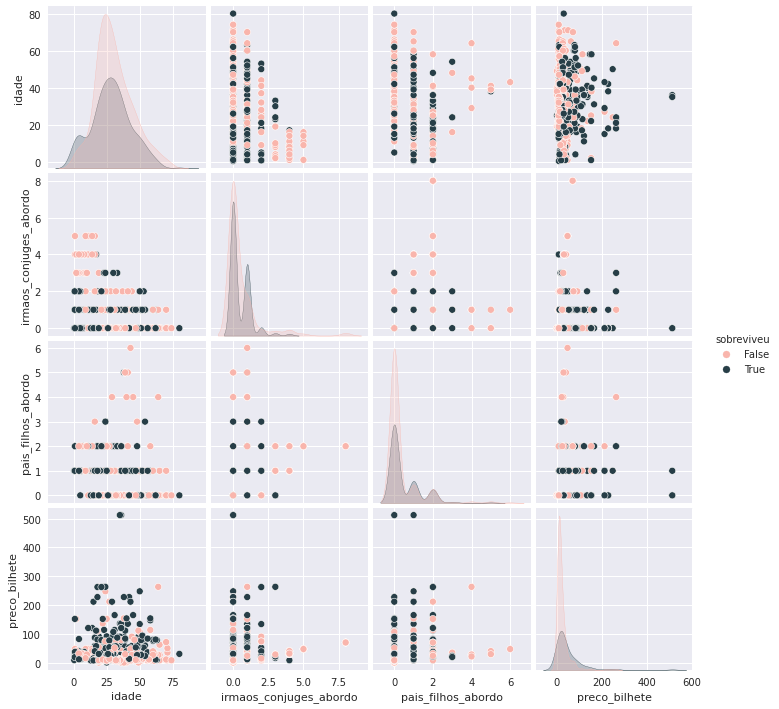

In [ ]:
sns.pairplot(df_num, hue='sobreviveu')

#### Columns relevance

In [ ]:
df.head(2)

,sobreviveu,classe_bilhete,genero,idade,irmaos_conjuges_abordo,pais_filhos_abordo,numero_bilhete,preco_bilhete,cabine_numero,local_embarque
id_passageiro,,,,,,,,,,
1,False,3,M,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
2,True,1,F,38.0,1,0,PC 17599,71.2833,C85,Cherbourg


In [ ]:
df.columns

Index(['sobreviveu', 'classe_bilhete', 'genero', 'idade',
       'irmaos_conjuges_abordo', 'pais_filhos_abordo', 'numero_bilhete',
       'preco_bilhete', 'cabine_numero', 'local_embarque'],
      dtype='object')

1. Preço bilhete está muito relacionado com a classe bilhete. A classe bilhete é do tipo categórico e fica mais correto trabalhar com ele do que diversos valores distintos de preço bilhete e por isso o preço bilhete será descartado nesse momento de análise

In [ ]:
df["cabine_numero"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: cabine_numero, Length: 147, dtype: int64

In [ ]:
df[["classe_bilhete", "cabine_numero"]].value_counts()

classe_bilhete  cabine_numero
3               G6               4
1               B96 B98          4
                C23 C25 C27      4
2               D                3
                E101             3
                                ..
1               C101             1
                B94              1
                B86              1
                B82 B84          1
                C62 C64          1
Length: 147, dtype: int64

In [ ]:
df_classe = df[df.classe_bilhete == 3]
df_classe[["classe_bilhete", "cabine_numero"]].value_counts()

classe_bilhete  cabine_numero
3               G6               4
                E121             2
                F G73            2
                E10              1
                F E69            1
                F G63            1
                F38              1
dtype: int64

In [ ]:
df_classe = df[df.classe_bilhete == 2]
df_classe[["classe_bilhete", "cabine_numero"]].value_counts()

classe_bilhete  cabine_numero
2               D                3
                E101             3
                F2               3
                F33              3
                F4               2
                D56              1
                E77              1
dtype: int64

In [ ]:
df_classe = df[df.classe_bilhete == 1]
df_classe[["classe_bilhete", "cabine_numero"]].value_counts()

classe_bilhete  cabine_numero
1               C23 C25 C27      4
                B96 B98          4
                C22 C26          3
                C126             2
                E24              2
                                ..
                B82 B84          1
                B80              1
                B79              1
                B78              1
                T                1
Length: 133, dtype: int64

In [ ]:
df[["classe_bilhete", "numero_bilhete"]].value_counts()

classe_bilhete  numero_bilhete
3               1601              7
                347082            7
                CA. 2343          7
                CA 2144           6
                3101295           6
                                 ..
2               SC/PARIS 2146     1
                SC/PARIS 2149     1
                SC/PARIS 2167     1
                SC/Paris 2163     1
3               W./C. 6609        1
Length: 681, dtype: int64

2. Existem três tipos de classe bilhete e a cabine numero pode estar diretamente relacionado com o tipo de classe bilhete correspondente. Como existem muitos números de cabine, é mais fácil se basear pela classe bilhete do que pelo número e dessa forma a coluna cabine_numero será descartada também da análise.

3. Da mesma forma, o numero do bilhete está relacionado com a cabine e por consequência da remoção do último, esse também será removido.

In [ ]:
df_local = df[df.local_embarque == "Southampton"]
df_local[["classe_bilhete", "local_embarque"]].value_counts()

classe_bilhete  local_embarque
3               Southampton       353
2               Southampton       164
1               Southampton       127
dtype: int64

In [ ]:
df_local = df[df.local_embarque == "Cherbourg"]
df_local[["classe_bilhete", "local_embarque"]].value_counts()

classe_bilhete  local_embarque
1               Cherbourg         85
3               Cherbourg         66
2               Cherbourg         17
dtype: int64

In [ ]:
df_local = df[df.local_embarque == "Queenstown"]
df_local[["classe_bilhete", "local_embarque"]].value_counts()

classe_bilhete  local_embarque
3               Queenstown        72
2               Queenstown         3
1               Queenstown         2
dtype: int64

4. Sobre o local embarque, ele é inconclusivo e portanto ele será mantido para fazermos análises mais precisas sobre a relevância no contexto de sobrevivência.

Além dessa análise, podemos fazer uma matriz de correlação para poder identificar se existem mais campos que se correlacionam e assim poder tirar do nosso dataset para facilitar a análise e um possível treinamento (melhorar o desempenho)

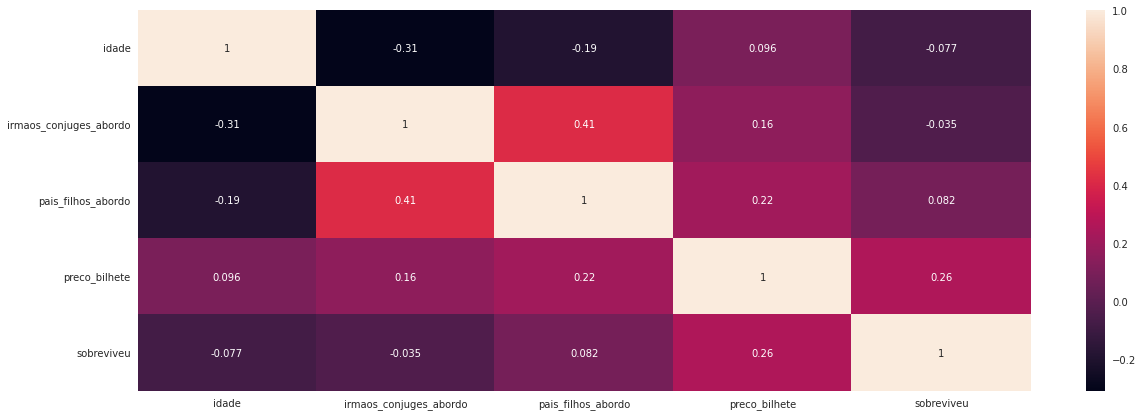

In [ ]:
fig, ax = plt.subplots(figsize=(20, 7))

sns.heatmap(df_num.corr(), annot = True)

Nenhum desses campos possuem uma alta correlação para podermos retirar uma coluna, logo serão mantidos todos as colunas de df_num

In [ ]:
df.drop(["cabine_numero", "preco_bilhete", "numero_bilhete"], axis = 1, inplace = True)

Por fim, nosso dataset ficará com as seguintes colunas:

In [ ]:
df.head(2)

,sobreviveu,classe_bilhete,genero,idade,irmaos_conjuges_abordo,pais_filhos_abordo,local_embarque
id_passageiro,,,,,,,
1,False,3,M,22.0,1,0,Southampton
2,True,1,F,38.0,1,0,Cherbourg


### `Pergunta 1`: Qual o fator que foi mais importante e menos importante para determinar a sobrevivência para esta população?



In [ ]:
compare_labels("classe_bilhete", "sobreviveu")

,classe_bilhete,sobreviveu
0,1,0.629630
1,2,0.472826
2,3,0.242363


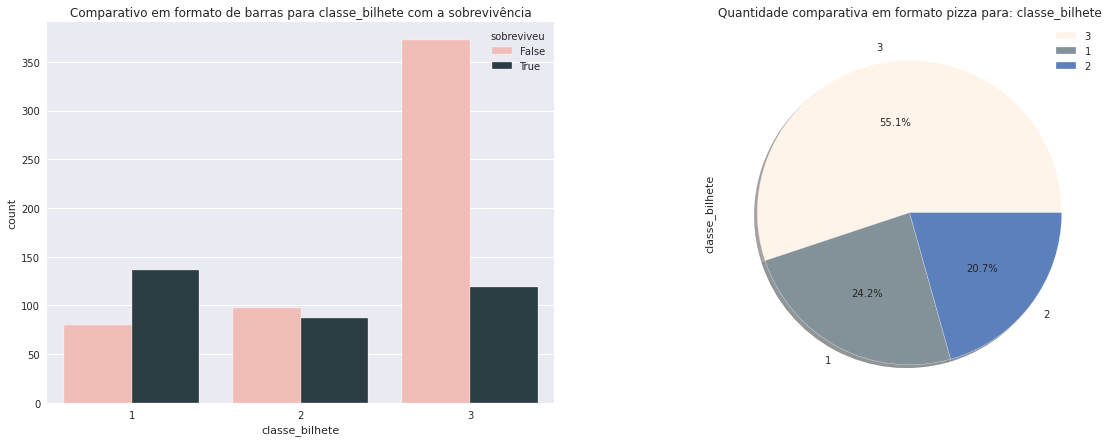

In [ ]:
plot_labels("classe_bilhete", "sobreviveu")

In [ ]:
compare_labels("genero", "sobreviveu")

,genero,sobreviveu
0,F,0.742038
1,M,0.188908


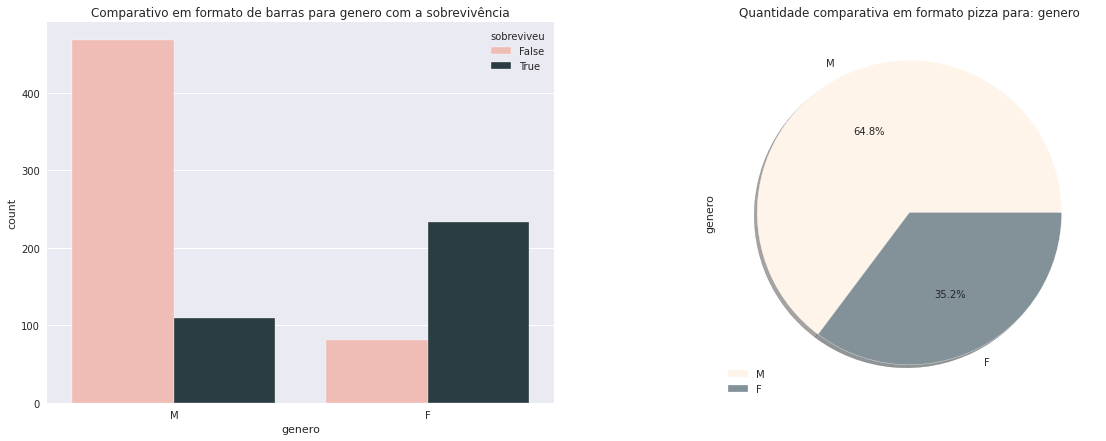

In [ ]:
plot_labels("genero", "sobreviveu")

In [ ]:
compare_labels("local_embarque", "sobreviveu")

,local_embarque,sobreviveu
0,Cherbourg,0.553571
1,Queenstown,0.389610
2,Southampton,0.336957


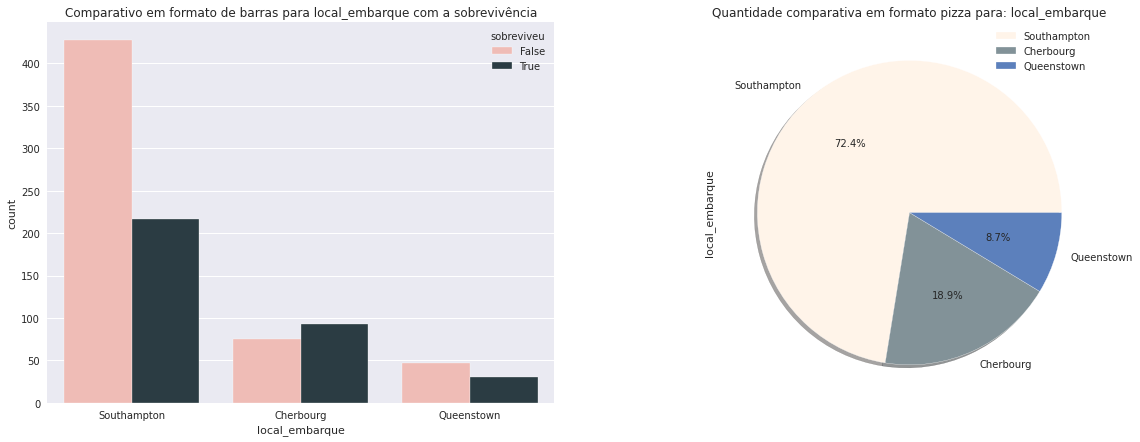

In [ ]:
plot_labels("local_embarque", "sobreviveu")

In [ ]:
compare_labels("irmaos_conjuges_abordo", "sobreviveu")

,irmaos_conjuges_abordo,sobreviveu
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


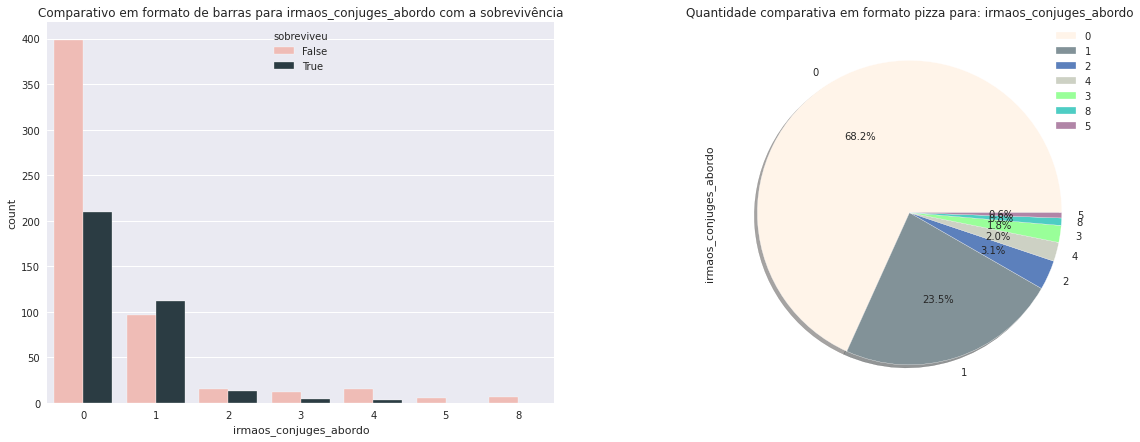

In [ ]:
plot_labels("irmaos_conjuges_abordo", "sobreviveu")

In [ ]:
compare_labels("pais_filhos_abordo", "sobreviveu")

,pais_filhos_abordo,sobreviveu
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


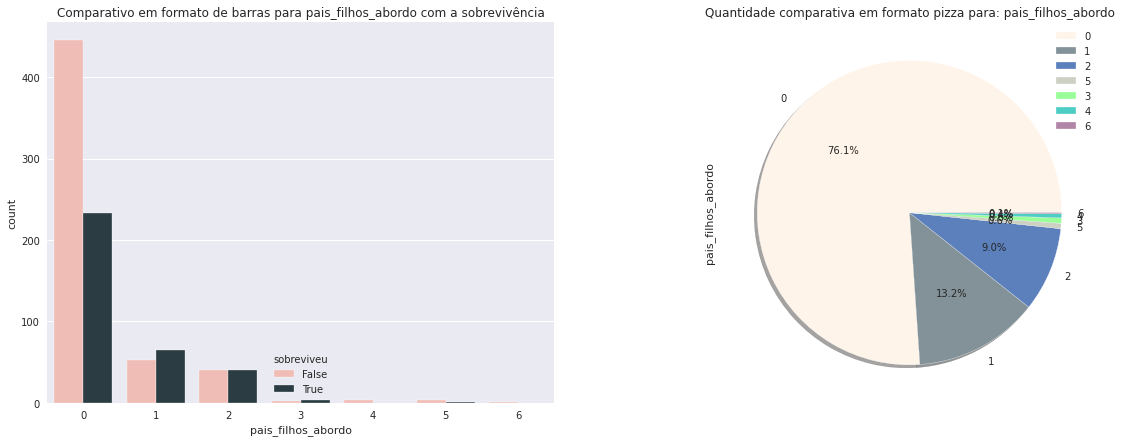

In [ ]:
plot_labels("pais_filhos_abordo", "sobreviveu")

#### Resposta: 

Dentro das variáveis que podem estabelecer um certo grau de sentido entre a relação sobrevivência pode-se ressaltar:

1. O gênero foi o que mais se destacou nesse quesito, pois a quantidade de mulheres que sobreviveram foram bem maiores do que os homens;
2. A idade pode ser um fator relevante, pois houveram uma alta taxa de sobrevivência para casos onde a idade é menor ou igual a 4. Adultos na faixa de idade de 20 a 30 anos foram os que mais morreram. Houve um outlier em idosos, onde só existe 1 com 80 anos e ele sobreviveu;
3. Pessoas que moraram em Cherbourg também tiveram uma maior taxa de sobrevivência;
4. Pessoas que possuiam um grau menor de quantidade de entes, familiares ou conjuges, tendem a sobreviver mais, porém existem condições que serão mostradas ao longo do notebook para detalhar melhor esse fato;
5. Classe bilhete 1, que é a mais cara, possuiu um maior grau de sobrevivência. Em contrapartida, a classe bilhete 3, que é a mais cara e a que mais foi comprada, é a que possui um menor grau de sobrevivência. Logo, o poder ecônomico dos tripulantes pode ser um fator que influencie na sobrevivência.


*   maior importância: gênero

*   menor importância: cabine numero e numero do bilhete. Pois existem muitos valores e esses valores nao podem ser classificados como uma forma usual de indicar o grau de sobrevivencia a partir disso.



### `Pergunta 2`: Você pode dizer que houve alguma influência do poder aquisitivo na sobrevivência do acidente? 



In [ ]:
compare_labels("classe_bilhete", "sobreviveu")

,classe_bilhete,sobreviveu
0,1,0.629630
1,2,0.472826
2,3,0.242363


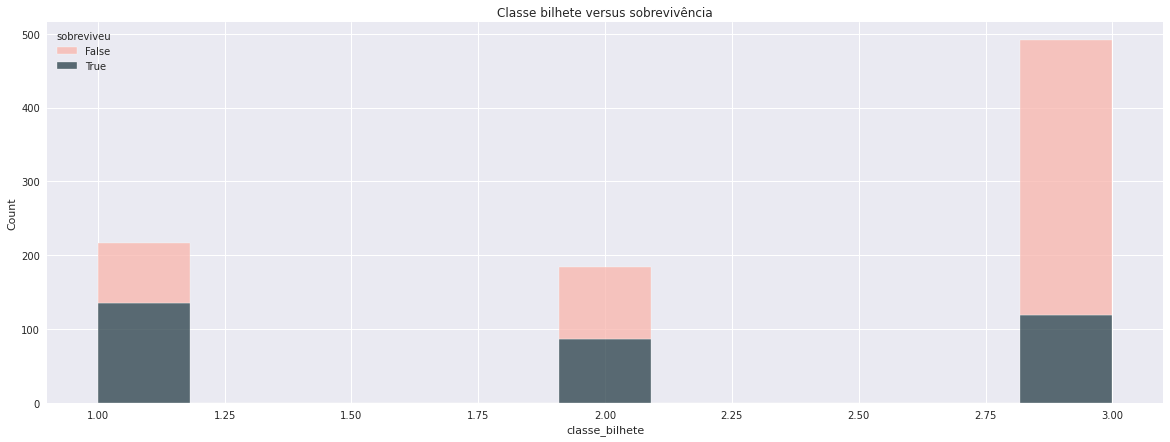

In [ ]:
compare_label_graph("classe_bilhete", "sobreviveu", "Classe bilhete versus sobrevivência")

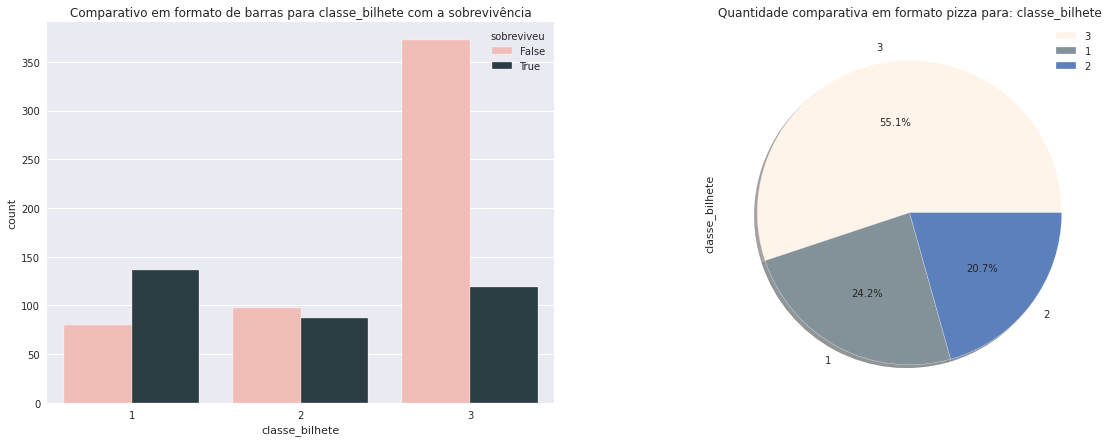

In [ ]:
plot_labels("classe_bilhete", "sobreviveu")

#### Resposta:

Pelo gráfico acima, pode-se tirar conclusão de que provavelmente a classe foi algo importante para a sobrevivência, pois se destaca a classe 1, onde houve uma maior quantidade de sobreviventes do que as demais classes mais "baixas" 2 e 3, onde mais da metade (62%) sobreviveram ao acidente.

A classe 3 é a classe que mais pessoas compraram ingresso, pois é a mais barata. Dessa forma, o poder econômico pode ser um fator que foi relevante para a sobrevivência

### `Pergunta 3`: O protocolo marítimo da época do Titanic tinha foco em dar prioridade a crianças e mulheres, analisando os dados podemos dizer se este protocolo foi seguido? 



In [ ]:
compare_labels("genero", "sobreviveu") # sobreviveu / total

,genero,sobreviveu
0,F,0.742038
1,M,0.188908


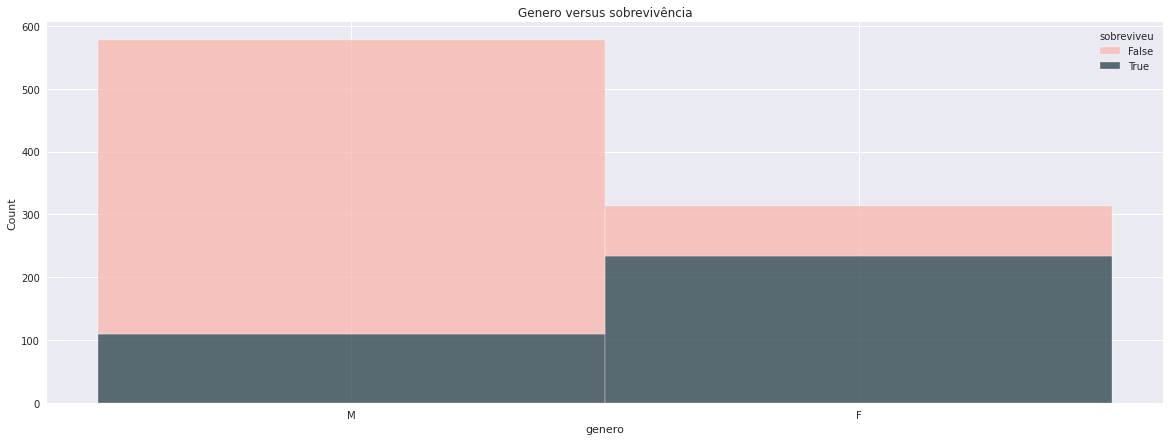

In [ ]:
compare_label_graph("genero", "sobreviveu", "Genero versus sobrevivência")

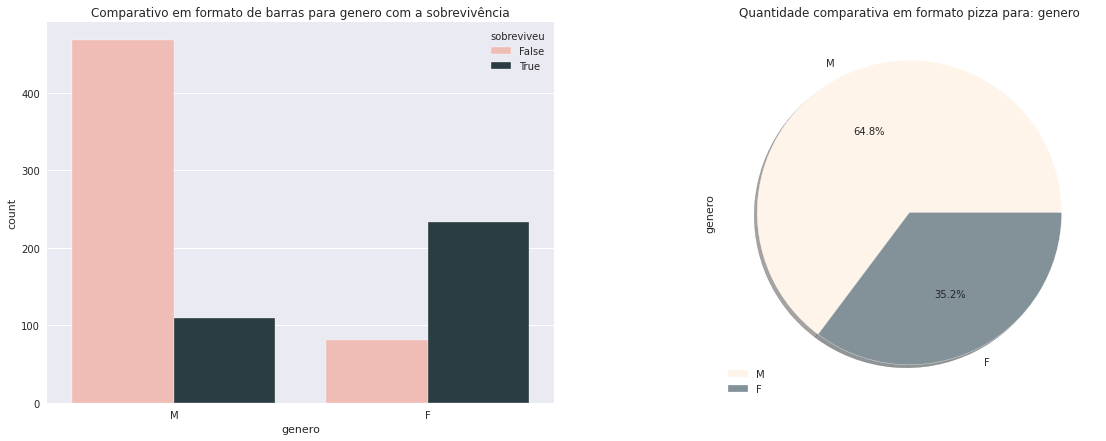

In [ ]:
plot_labels("genero", "sobreviveu")

#### Resposta 1:

Pelas análises acima, percebe-se que o público feminino foi priorizado.

#### Resposta 2:

In [ ]:
df["range_idade"] = df["idade"]

for i, row in df.iterrows():
  if row["range_idade"] > 60:
    df.loc[i, "range_idade"] = "Idoso"
  elif row["range_idade"] < 5:
    df.loc[i, "range_idade"] = "Bebe"
  elif row["range_idade"] >= 5 and row["range_idade"] <= 9:
    df.loc[i, "range_idade"] = "Crianca"
  elif row["range_idade"] >= 10 and row["range_idade"] <= 18:
    df.loc[i, "range_idade"] = "Adolescente"
  else: 
    df.loc[i, "range_idade"] = "Adulto"

In [ ]:
compare_labels("range_idade", "sobreviveu")

,range_idade,sobreviveu
2,Bebe,0.675000
3,Crianca,0.500000
0,Adolescente,0.415584
1,Adulto,0.365753
4,Idoso,0.227273


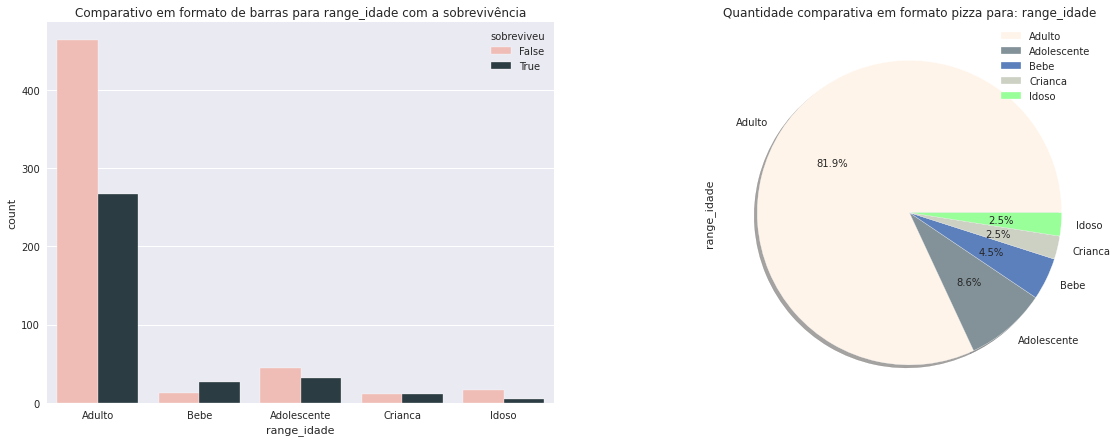

In [ ]:
plot_labels("range_idade", "sobreviveu")

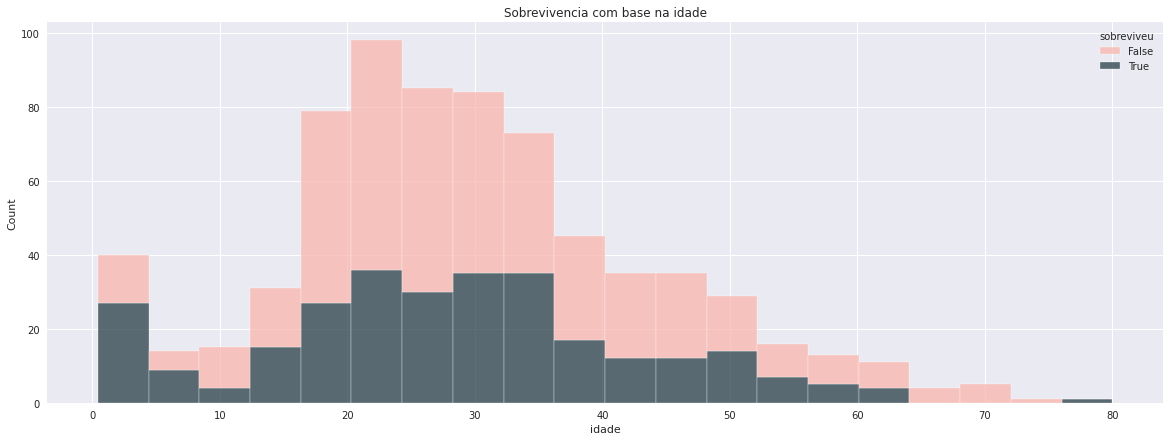

In [ ]:
compare_label_graph("idade", "sobreviveu", "Sobrevivencia com base na idade")

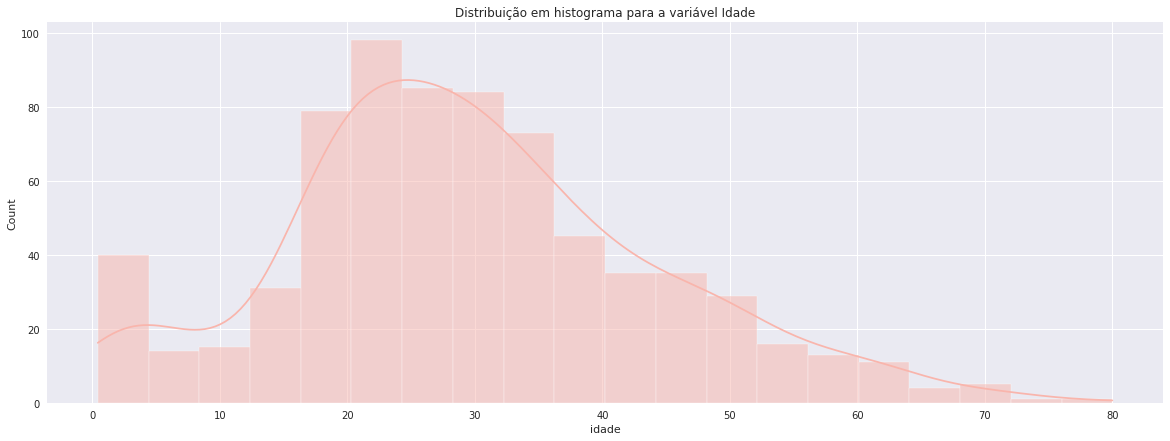

In [ ]:
fig, ax = plt.subplots(figsize=(20, 7))

sns.histplot(data=df, x="idade", ax=ax, kde=True).set_title('Distribuição em histograma para a variável Idade')

plt.show()

Percebe-se que a curva se demonstra favoravel quando a idade é menor do que 5, pois se apresenta uma maior taxa de sobrevivência nessa parte. O público adulto é predominante nessa tripulação e teve uma alta taxa de mortalidade. Os tripulantes "bebe" e "criança" foram priorizadas nesse setor.

### `Pergunta 4`: Ter uma família no barco influenciou negativamente ou positivamente para a sua sobrevivência?



In [ ]:
df["tamanho_familia"] = df["irmaos_conjuges_abordo"] + df["pais_filhos_abordo"] + 1     # 1 para contar a pessoa da linha

for i, row in df.iterrows():
  if row["tamanho_familia"] == 1:
    df.loc[i, "tamanho_familia"] = "Sozinho"
  elif row["tamanho_familia"] >= 2 and row["tamanho_familia"] <= 4:
    df.loc[i, "tamanho_familia"] = "Pequena"
  elif row["tamanho_familia"] >= 5:
    df.loc[i, "tamanho_familia"] = "Grande"

In [ ]:
compare_labels("irmaos_conjuges_abordo", "sobreviveu")

,irmaos_conjuges_abordo,sobreviveu
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


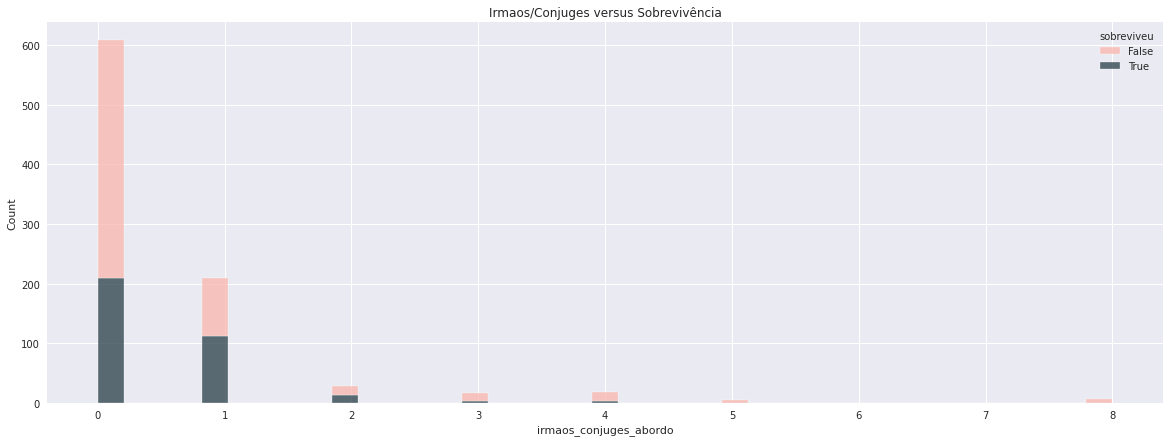

In [ ]:
compare_label_graph("irmaos_conjuges_abordo", "sobreviveu", "Irmaos/Conjuges versus Sobrevivência")

In [ ]:
compare_labels("pais_filhos_abordo", "sobreviveu")

,pais_filhos_abordo,sobreviveu
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


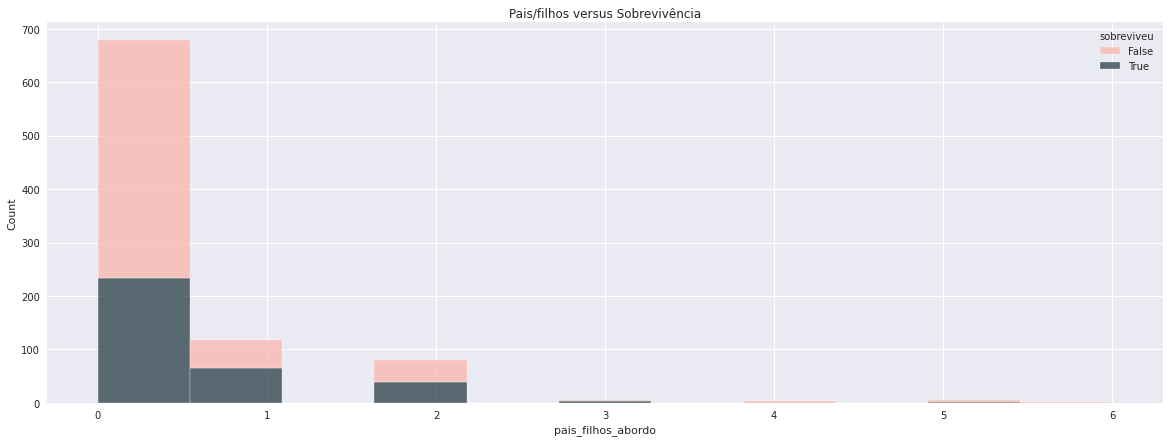

In [ ]:
compare_label_graph("pais_filhos_abordo", "sobreviveu", "Pais/filhos versus Sobrevivência")

A tendência vista é que quanto mais relações tiver, sendo pais_filhos ou irmaos_conjunges, menor é a taxa de sobrevivência

Outra abordagem que pode ser analisada é adicionar o fator "família" 

In [ ]:
compare_labels("tamanho_familia", "sobreviveu")

,tamanho_familia,sobreviveu
1,Pequena,0.578767
2,Sozinho,0.303538
0,Grande,0.161290


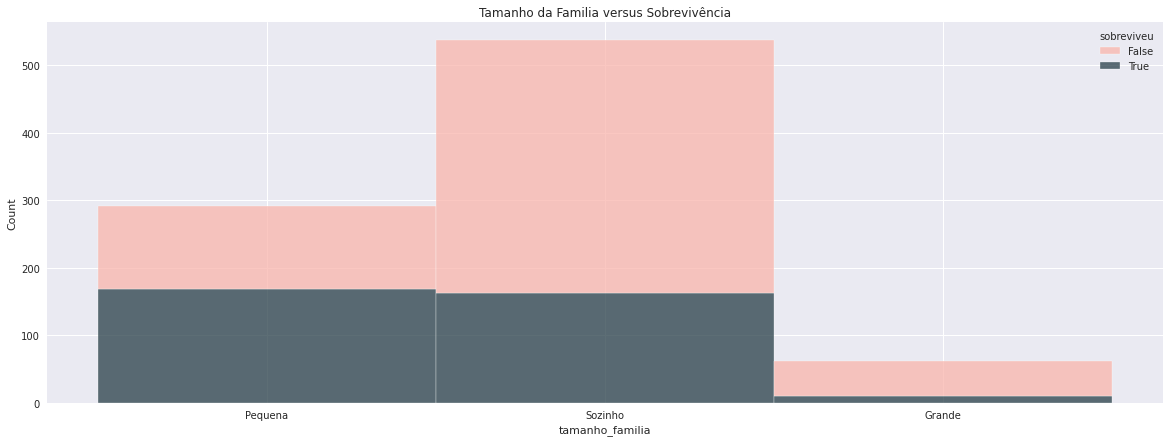

In [ ]:
compare_label_graph("tamanho_familia", "sobreviveu", "Tamanho da Familia versus Sobrevivência")

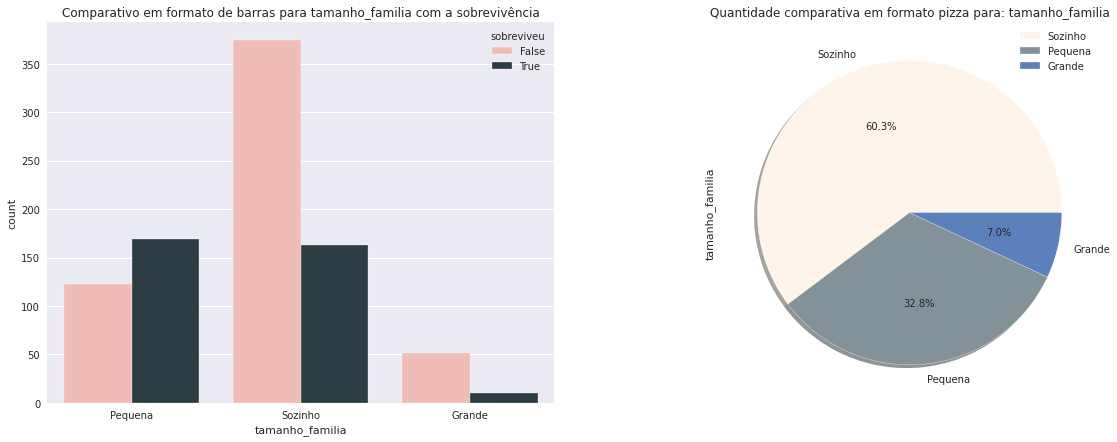

In [ ]:
plot_labels("tamanho_familia", "sobreviveu")

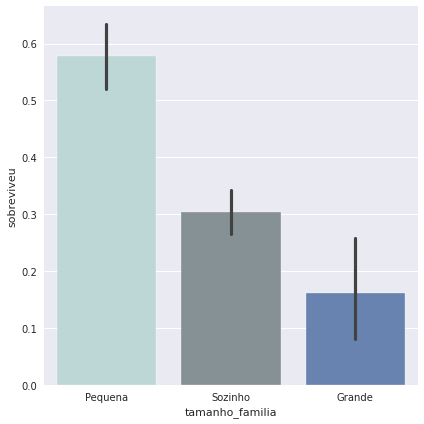

In [ ]:
sns.catplot(x="tamanho_familia", y = "sobreviveu", data=df, kind="bar", height=6, palette = ['#B8DBD9', '#829298','#5C80BC']);

#### Resposta:

Pela análise acima, percebe-se que estar sozinho não foi um fator importante para sobreviver, até porque quem esteve sozinho na embarcação não teve uma taxa de sobrevivência alta. Nesse contexto, quem teve uma alta quantidade de parentes/entes na embarcação, também não teve muito grau de sobrevivência. Sobreviveram mais aqueles que tiveram entre 1 a 3 parentes/irmaos/conjuges na embarcação, onde teve um público intermediário e teve uma alta taxa de sobrevivência se for comparada as outras categorias (categoria "pequena")

### `Pergunta 5`: Qual o perfil de quem não sobreviveu? E qual é o perfil de quem sobreviveu?
- Entenda Perfil como: Gênero, Idade e Classe Social. Caso você identifique alguma nova característica pode adicioná-la ao perfil.




#### Perfil não sobreviveu:

In [ ]:
df_nao_sob = df[df["sobreviveu"] == False]
df_nao_sob[["range_idade", "classe_bilhete", "genero", "tamanho_familia", "sobreviveu"]]

,range_idade,classe_bilhete,genero,tamanho_familia,sobreviveu
id_passageiro,,,,,
1,Adulto,3,M,Pequena,False
5,Adulto,3,M,Sozinho,False
6,Adulto,3,M,Sozinho,False
7,Adulto,1,M,Sozinho,False
8,Bebe,3,M,Grande,False
...,...,...,...,...,...
885,Adulto,3,M,Sozinho,False
886,Adulto,3,F,Grande,False
887,Adulto,2,M,Sozinho,False


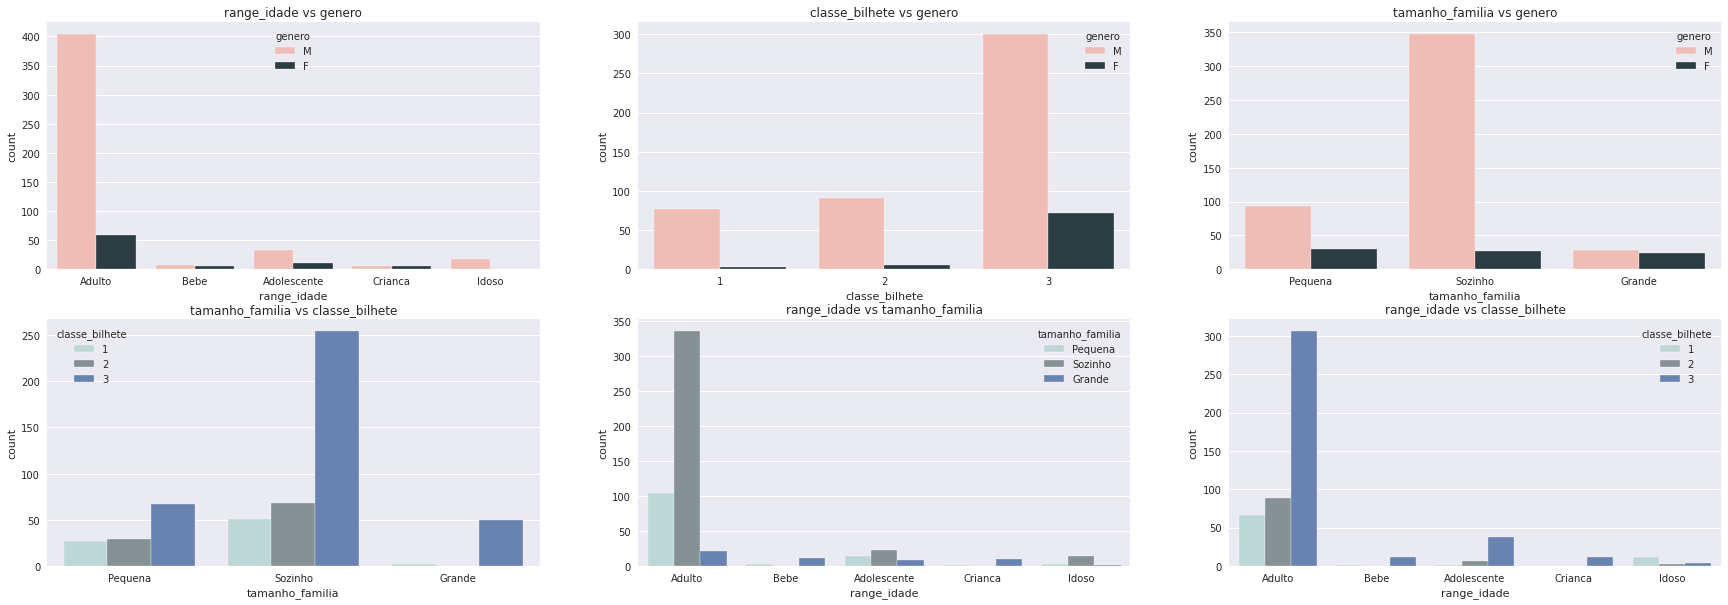

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(30, 10))
countplot= sns.countplot(data=df_nao_sob, x="range_idade", hue = "genero",  ax=ax[0, 0]).set_title(f"range_idade vs genero")
countplot= sns.countplot(data=df_nao_sob, x="classe_bilhete", hue = "genero",  ax=ax[0, 1]).set_title(f"classe_bilhete vs genero")
countplot= sns.countplot(data=df_nao_sob, x="tamanho_familia", hue = "genero",  ax=ax[0, 2]).set_title(f"tamanho_familia vs genero")
countplot= sns.countplot(data=df_nao_sob, x="tamanho_familia", hue = "classe_bilhete",  ax=ax[1, 0], palette = ['#B8DBD9', '#829298','#5C80BC']).set_title(f"tamanho_familia vs classe_bilhete")
countplot= sns.countplot(data=df_nao_sob, x="range_idade", hue = "tamanho_familia",  ax=ax[1, 1], palette = ['#B8DBD9', '#829298','#5C80BC']).set_title(f"range_idade vs tamanho_familia")
countplot= sns.countplot(data=df_nao_sob, x="range_idade", hue = "classe_bilhete",  ax=ax[1, 2], palette = ['#B8DBD9', '#829298','#5C80BC']).set_title(f"range_idade vs classe_bilhete")

Masculino, adulto, sozinho e de classe bilhete 3 é um perfil que em grandes casos acontece o fato de não sobreviver.

#### Perfil sobreviveu:

In [ ]:
df_sob = df[df["sobreviveu"] == True]
df_sob[["range_idade", "classe_bilhete", "genero", "tamanho_familia", "sobreviveu"]]

,range_idade,classe_bilhete,genero,tamanho_familia,sobreviveu
id_passageiro,,,,,
2,Adulto,1,F,Pequena,True
3,Adulto,3,F,Sozinho,True
4,Adulto,1,F,Pequena,True
9,Adulto,3,F,Pequena,True
10,Adolescente,2,F,Pequena,True
...,...,...,...,...,...
876,Adolescente,3,F,Sozinho,True
880,Adulto,1,F,Pequena,True
881,Adulto,2,F,Pequena,True


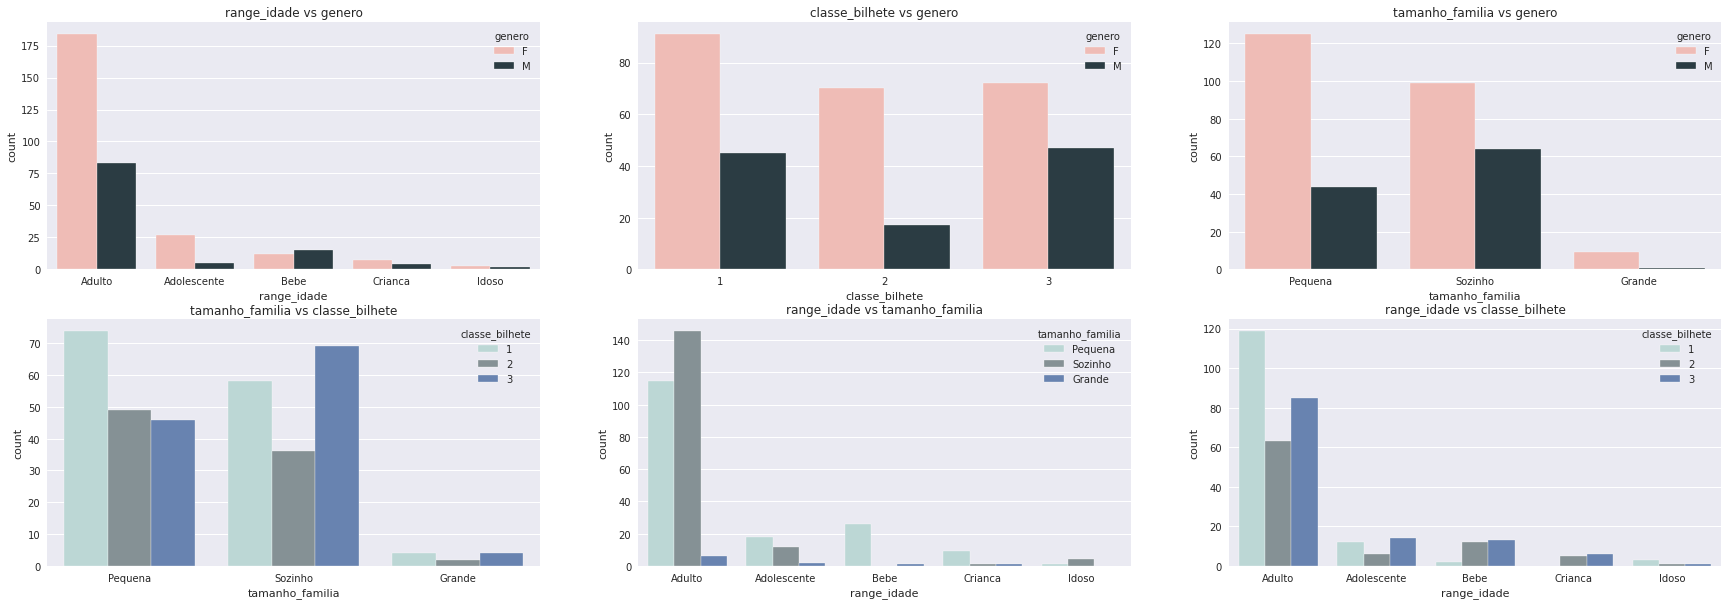

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(30, 10))
countplot= sns.countplot(data=df_sob, x="range_idade", hue = "genero",  ax=ax[0, 0]).set_title(f"range_idade vs genero")
countplot= sns.countplot(data=df_sob, x="classe_bilhete", hue = "genero",  ax=ax[0, 1]).set_title(f"classe_bilhete vs genero")
countplot= sns.countplot(data=df_sob, x="tamanho_familia", hue = "genero",  ax=ax[0, 2]).set_title(f"tamanho_familia vs genero")
countplot= sns.countplot(data=df_sob, x="tamanho_familia", hue = "classe_bilhete",  ax=ax[1, 0], palette = ['#B8DBD9', '#829298','#5C80BC']).set_title(f"tamanho_familia vs classe_bilhete")
countplot= sns.countplot(data=df_sob, x="range_idade", hue = "tamanho_familia",  ax=ax[1, 1], palette = ['#B8DBD9', '#829298','#5C80BC']).set_title(f"range_idade vs tamanho_familia")
countplot= sns.countplot(data=df_sob, x="range_idade", hue = "classe_bilhete",  ax=ax[1, 2], palette = ['#B8DBD9', '#829298','#5C80BC']).set_title(f"range_idade vs classe_bilhete")

Grafico acima (dos que sobreviveram):

- Bebe: Maioria sendo classe 2 ou 3, equilibrado entre os generos, sendo que se for de classe 2, tem a tendencia de ser F.
- Crianca: Nenhuma criança que sobreviveu é da classe 1, ou seja, toda criança que sobreviveu em teoria não é rica. Outros fatores são equilibrados, tanto entre genero e classe
- Adolescente: Maioria é público feminino e está entre a classe 1 e 3.
- Adulto: Predominante público feminino, uma breve diferença para a classe 1 sendo a maior.
- Idoso: Predominante classe 1, equilibrio entre generos.

Por enquanto, o perfil é somente sendo priorizado a característica de gênero, sendo público feminino uma preferência, pois em todas as classes a tripulação feminina foi a que mais sobreviveu e em relação à idade, percebe-se que isso também é uma tendência, apenas uma diferença quando se olha para o bebe, onde a maioria que sobreviveu foi masculino.

Um outro ponto a se olhar é no contexto do tamanho da familia, onde a familia pequena é uma tendência para a sobrevivência, menos para o idoso. E desse tamanho, existe uma relação em ser da classe bilhete 1.

Resposta de perfil para sobreviver: Feminino, adulto, familia pequena ou sozinho, classe 1